# Object: Money

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
folder = '/content/drive/MyDrive/AI-project/Money/Money_train/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('10k '): 
    output=1
  if file.startswith('20k '): 
    output=2
  if file.startswith('50k '): 
    output=3  
  if file.startswith('100k '): 
    output=4
  if file.startswith('200k '): 
    output=5
  if file.startswith('500k '): 
    output=6
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

x_train = x_train.reshape(1440, 30, 30, 3)
x_train = x_train.astype('float32')/255
print(x_train.shape)

folder = '/content/drive/MyDrive/AI-project/Money/Money_test/'
x_test,y_test=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('10k '): 
    output=1
  if file.startswith('20k '): 
    output=2
  if file.startswith('50k '): 
    output=3  
  if file.startswith('100k '): 
    output=4
  if file.startswith('200k '): 
    output=5
  if file.startswith('500k '): 
    output=6
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_test = x_test.reshape(60, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

(1440, 30, 30, 3) (1440, 7)
(1440, 30, 30, 3)
(60, 30, 30, 3) (60, 7)
(60, 30, 30, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

Epoch 1/100
23/23 [==============================] - 8s 16ms/step - loss: 1.8428 - accuracy: 0.1764
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 1.7434 - accuracy: 0.2313
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 1.4216 - accuracy: 0.4076
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 1.2742 - accuracy: 0.4910
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0240 - accuracy: 0.6375
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.9398 - accuracy: 0.6653
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7373 - accuracy: 0.7465
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.7840
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.8319
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.8486
Epoch 11

In [ ]:
model.save('money.h5')

Input Money: 500k
1/1 [==============================] - 0s 22ms/step
Predicted label: 200k
1/1 [==============================] - 0s 18ms/step
Predicted label: 500k
1/1 [==============================] - 0s 17ms/step
Predicted label: 500k
1/1 [==============================] - 0s 28ms/step
Predicted label: 500k
1/1 [==============================] - 0s 17ms/step
Predicted label: 200k
1/1 [==============================] - 0s 18ms/step
Predicted label: 500k
1/1 [==============================] - 0s 19ms/step
Predicted label: 500k
1/1 [==============================] - 0s 25ms/step
Predicted label: 500k
1/1 [==============================] - 0s 34ms/step
Predicted label: 500k
1/1 [==============================] - 0s 29ms/step
Predicted label: 500k


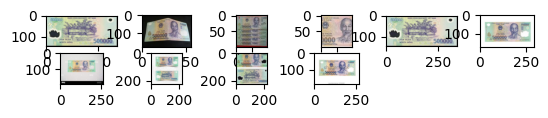

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/AI-project/Money/Money_test/'

dict = {1:'10k', 2:'20k', 3:'50k', 4:'100k', 5:'200k', 6:'500k'}

input_ = input("Input Money: ")
for i in range(10):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  prediction = model.predict(img_arr)
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()

1/1 [==============================] - 0s 29ms/step


array([6])

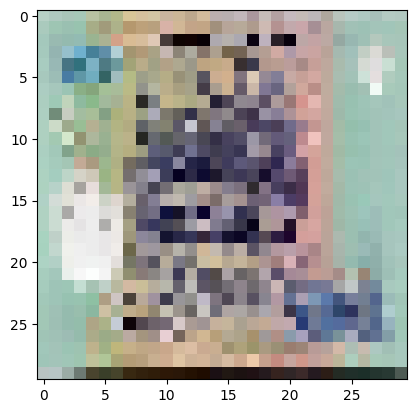

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/AI-project/Money/500k.jpg',target_size=(30,30))
plt.imshow(img)

import numpy as np
img = img_to_array(img)
img = img.reshape(1,30,30,3)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)